**Class:** C5.4 Networks

**From:** Miguel Torres Costa

**To:** Mr Michael Coughlan

# All imports

In [1]:
import numpy as np
import networkx as nx
import math
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Utils

In [15]:
def draw(G,**kwargs):
    if len(G)<20:
        nx.draw_spring(G,
                       node_size=400,
                       with_labels=True)
    else:
        nx.draw_spring(G,
                       node_size=10,
                       with_labels=False)       

In [3]:
def create_undirected_graph(edges):
    G=nx.Graph()
    G.add_edges_from(edges)
    return G

In [4]:
def create_directed_graph(edges):
    DG=nx.DiGraph()
    DG.add_edges_from(edges)
    return DG

In [5]:
def load_graph_from_tsv(file):
    f = open(file,"r")
    text = f.readlines()
    clean = lambda x:x.strip("\n").split(" ")
    node_pairs = list(map(clean,text[2:]))
    node_pairs = [(int(x[0]),int(x[1])) for x in node_pairs]
    node_pairs[:4]
    G = nx.Graph()
    G.add_edges_from(node_pairs)
    return G

# (Q2) Connectedness
**a) **
Draw a graph that is weakly connected but not strongly connected.  Write down the adjacency matrix of
this graph.  What can happen to a random walk in such a graph, and what implication does this have for
the asymptotic density of walkers on the nodes?

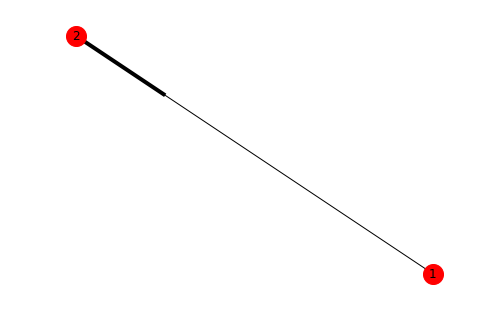

In [6]:
DG = create_directed_graph([(1,2)])
draw(DG)

Adjacency matrix
$M=
\left[ {\begin{array}{cc}
0 & 1 \\
0 & 0 \\
\end{array} } \right]$

Given the simplicity of the drawn graph, the only thing that can happen is for the walk to end on the 2nd node and get stuck there. For a general weakly connected graph then we can write a partial ordering on the strongly connected components. From that partial ordering we can make a tree, and a random walk will inevitably get stuck on one of the leaves.

**b)**
Consider the adjacency-matrix representation of a graph.  What is the difference between the spectrum of
directed networks versus that of undirected networks?  (Recall that the set of eigenvalues of a matrix is
called the
spectrum
of that matrix.)

**Answer:** Since undirected matrices are represented by symmetric matrices, its eigenvalues are always real, whereas directed graphs are represented by more general matrices which might have non-real eigenvalues.
Hence undirected graphs have matrices whose spectrum is a subset of the reals, whereas in directed graphs that might not be true.

# (Q3) Clustering  coefficients
Draw  a  very  small  network  in  which  the  global  clustering  coefficient  and  mean  local
clustering coefficient have different values.  Write down the adjacency matrix for this network.

**Answer:** Letting $c_k :=$ Number of triangles including the kth node $* \frac{2}{(\deg(k)-1)\deg(k)}$, then the mean local clustering coefficient is given by $\sum_k{c_k}$ where the sum goes through all nodes $k$. The global clustering coefficient (whose definition can be found on wikipedia but not on the lecture notes) is given by
$3 * \frac{number.of.connected.triangles}{number.of.connected.triples}$ . In order to compute the global clustering coefficient we use **nx.transitivity**
and for the mean local clustering coefficient we use **nx.average_clustering**.

In [7]:
def clustering_analysis(G):
    print("Global clustering coefficient: " + str(nx.transitivity(G)))
    print("Mean Local coefficient: " + str(nx.average_clustering(G)))
    draw(G)

Global clustering coefficient: 0.75
Mean Local coefficient: 0.8333333333333333


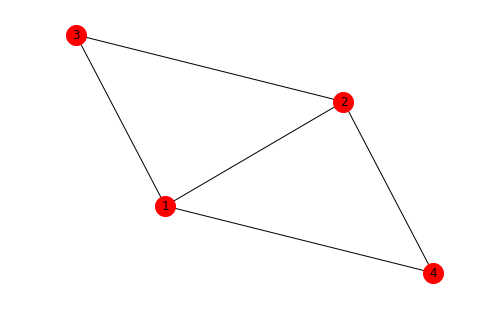

In [8]:
G = create_undirected_graph([(1,2),(2,3),(1,3),(1,4),(2,4)])
clustering_analysis(G)

This graph has adjacency Matrix
$$M=
\left[ {\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
0 & 1 & 1 & 0\\
\end{array} } \right]$$
in other words, $(1,4)$ is the only missing edge

# (Q4) Small-world
**Ex.IV.4:**   Generate  graphs  of  the  model  c  from  Figure  (13)  and  calculate  the  dependence  of
the network diameter and clustering coefficient on the number of shortcuts.  Is this model, very similar to the
so-called Watts-Strogatz model, a good model for a social network?  Why or why not?

**Answer:** In order to compute the diameter we will use **nx.diameter** and for the clustering coefficient we will use **nx.transitivity** (i.e. the global clustering coefficient).
For the number of shortcuts ...

(unfinished since I could not find model c from Figure (13)

# (Q5) Centrality  measures
**Ex.IV.5:** Take  an  undirected  network  and  measure  the  correlation  between  different
centrality measures.  The correlation can either be estimated with the centrality values (Spearman) or with their
associated ranking (Kendall). Construct an example of a graph where one node has a small degree centrality
but a high betweenness centrality.

**Answer:** Given 2 random variables (or sets of observation) $X$ and $Y$, we have

**Pearson Correlation:** $\frac{\mathrm{Cov}(X,Y)}{\sigma(X)\sigma(Y)}$

**Kendall Correlation:** After ordering the observation pairs, use $\frac{(number.of.concordant.pairs)-(number.of.discordant.pairs)}{\frac{1}{2}{n(n-1)}}$

**Spearman Correlation:** Pearson correlation after mapping the observations $X_i$, $Y_i$ to their ranks.

In [17]:
def build_centrality_measures_dataframe(G):
    
    # Builds dictionaries with the different metrics
    betweenness = nx.betweenness_centrality(G)
    degree = dict(nx.degree(G))
    closeness = nx.closeness_centrality(G)
    katz = nx.katz_centrality(G)
    pagerank = nx.pagerank(G,alpha=0.5) # The $ \alpha=.85 $ was chosen randomly. Is there a better approach?
    
    # Builds a dataframe with the measures as columns and the nodes as rows
    df = pd.DataFrame({'betweenness':betweenness,
                       'degree':degree,
                       'closeness':closeness,
                       'katz':katz,
                       'pagerank':pagerank})
    return df

# Requires the centrality_measures_dataframe as input
def correlation_of_centrality_metrics(df):
    # Builds correlation matrices for the different metrics
    for metric in ['pearson', 'kendall', 'spearman']:
        print("\n\n" + str(metric.capitalize()) + ' correlation:')
        print(df.corr(metric))

**Dataset used:** The propo dataset used consists of nodes representing proteins and edges representing pairs of interacting proteins.

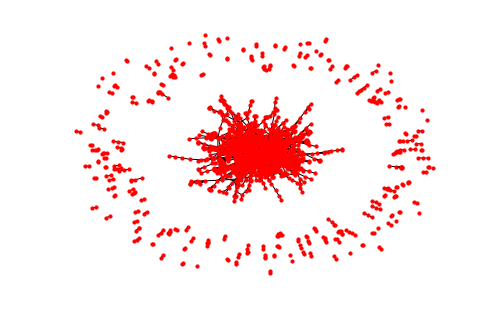

In [18]:
G = load_graph_from_tsv("datasets/propo.tsv")
draw(G)

In [19]:
df = build_centrality_measures_dataframe(G)
df.describe()

,betweenness,closeness,degree,katz,pagerank
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000
mean,0.001891,0.091932,2.435294,0.020112,0.000535
std,0.006035,0.051226,3.164618,0.011416,0.000374
min,0.000000,0.000000,1.000000,0.013533,0.000313
25%,0.000000,0.080883,1.000000,0.014203,0.000362
50%,0.000000,0.112335,1.000000,0.016208,0.000446
75%,0.001219,0.126392,3.000000,0.021312,0.000548
max,0.129420,0.183020,56.000000,0.200559,0.009283


In [20]:
correlation_of_centrality_metrics(df)



Pearson correlation:
             betweenness  closeness    degree      katz  pagerank
betweenness     1.000000   0.297399  0.837694  0.818457  0.739478
closeness       0.297399   1.000000  0.302620  0.456009  0.090823
degree          0.837694   0.302620  1.000000  0.868335  0.929309
katz            0.818457   0.456009  0.868335  1.000000  0.726429
pagerank        0.739478   0.090823  0.929309  0.726429  1.000000


Kendall correlation:
             betweenness  closeness    degree      katz  pagerank
betweenness     1.000000   0.409058  0.813356  0.548139  0.548832
closeness       0.409058   1.000000  0.359753  0.713957 -0.081977
degree          0.813356   0.359753  1.000000  0.569681  0.638604
katz            0.548139   0.713957  0.569681  1.000000  0.064198
pagerank        0.548832  -0.081977  0.638604  0.064198  1.000000


Spearman correlation:
             betweenness  closeness    degree      katz  pagerank
betweenness     1.000000   0.523995  0.897253  0.676930  0.699047
closen

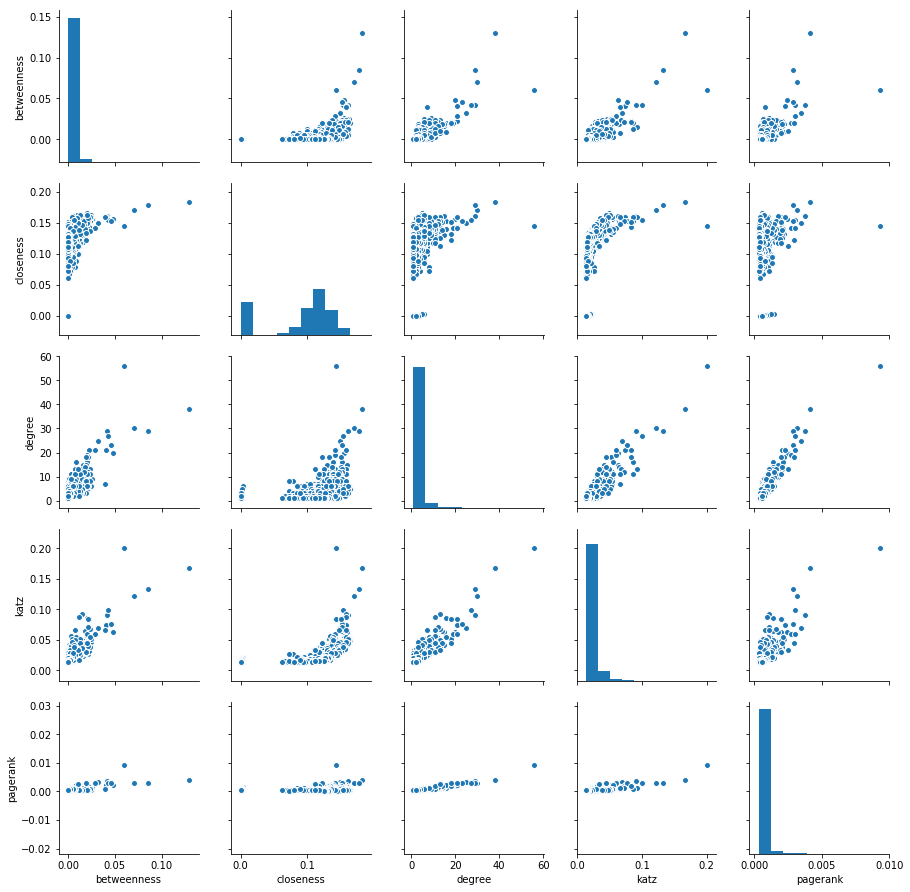

In [21]:
sns.pairplot(df)

**b)** Construct an example of a graph where one node has a small degree centrality
but a high betweenness centrality.

**Answer:** One possile approach is to take 2 complete graphs $K_n$, pick one node from each and connect them both to a $(2n+1)th$ node.
That node will have $\deg 2$ but betweenness $1 - \frac{2\binom{n}{2}}{\binom{2n+1}{2}} = 1 - 2 \frac{n(n-1)}{2n(2n-1)} = 1 - \frac{n-1}{2n-1} = \frac{n}{2n-1}$, which converges to $\frac{1}{2}$ as $n \rightarrow \infty$. On the other hand the average degree of a node in this graph goes to infinity as $n \rightarrow \infty$. 

node,1,2,4,5,7,3,6
betweenness,0.0,0.0,0.0,0.0,0.6,0.533333,0.533333
degree,2.0,2.0,2.0,2.0,2.0,3.000000,3.000000


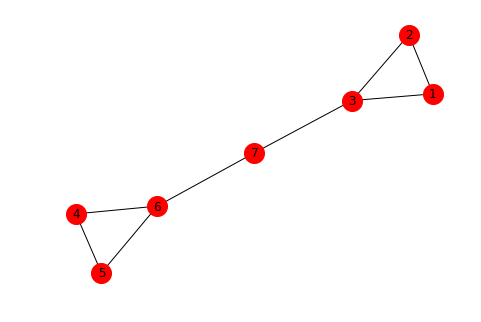

In [14]:
G = create_undirected_graph([(1,2),(2,3),(1,3),(4,5),(4,6),(5,6),(3,7),(6,7)])
draw(G)
comparison = pd.DataFrame({'degree':dict(nx.degree(G)),
                           'betweenness':nx.betweenness_centrality(G)})
comparison.index.name='node'
comparison.sort_values(by=['degree','betweenness']).T

Node $7$ has $\deg 2$ but betweeness $\frac{3}{2(3)-1} = \frac{3}{5}$, whereas all other nodes have at least $\deg 2$ and at most betweenness $\frac{3}{5}$